# ***Name - Jahanvi Sharma***

### **Task - 1 : Predict the precentage of marks of an student based on the number of study hour.**

### **Question - What will be predicted score if a student studies for 9.25 hours / day ?**

## **Importing Libraries :**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

After importing all the required libraries, let's import the data from the dataset.

## **Import Data from Dataset :**

In [ ]:
read=pd.read_csv("/t1.csv")
print("data is imported...!!!")
read

data is imported...!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now print the full summary of the dataframe :

In [ ]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


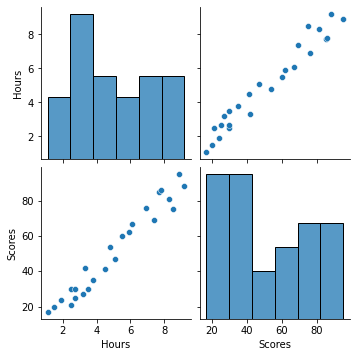

In [34]:
import seaborn as sns
sns.pairplot(read)

## **Plot imported data :**

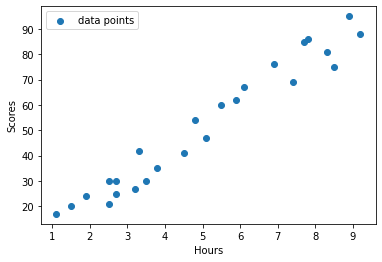

In [ ]:
plt.scatter(read.Hours,read.Scores,label="data points")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

From the above Scatter plot we can observe that the scatter graph is a positive liner regression.

## **Preparing data for the model and splitting into train and test sets.**

In [ ]:
x=np.array(read[['Hours']])
y=np.array(read[['Scores']])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"size of train data and test data is {x_train.size,y_train.size,x_test.size,y_test.size}")

size of train data and test data is (20, 20, 5, 5)


## **Training the Model :**

In [ ]:
##we know that line equation is : y= m*x + c
##where, m = gradient, c = intercept on y-axis, x and y are the continous variables
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
m=model.coef_
print(f"The value of m in line eq is {m[0][0]}")
c=model.intercept_
print(f"The value of c in line eq is {c[0]}")

The value of m in line eq is 9.91065648064224
The value of c in line eq is 2.018160041434662


## **Plot the Train Data :**

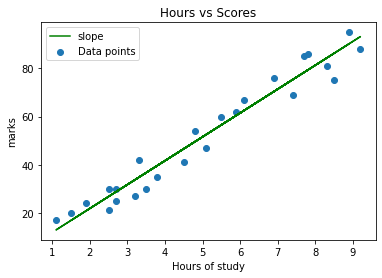

In [ ]:
#After training the model lets plot our data
line=model.coef_*x + model.intercept_
plt.scatter(x,y,label='Data points')
plt.plot(x,line,color='green', label='slope')
plt.title('Hours vs Scores',color='Black')
plt.xlabel('Hours of study',color='Black',)
plt.ylabel('marks',color='Black')
plt.legend()
plt.show()

## **Testing the Data :**

In [ ]:
#predicting Scores for test data
Y_pred=model.predict(x_test)
print(Y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


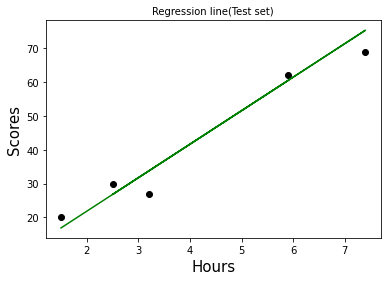

In [ ]:
#plotting line on the test data
plt.plot(x_test,Y_pred,color='green')
plt.scatter(x_test,y_test,color='black')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

In [ ]:
#Comparing Actual vs Predicted Scores
test1 = list(y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual data':test1,'Result':prediction})
df_compare

,Actual data,Result
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


## **Check Accuracy of Model**

In [ ]:
metrics.r2_score(y_test,Y_pred)

0.9454906892105354

In [ ]:
#To check the accuracy we will use R squared value
r_square=model.score(x_train,y_train)
print(f"R squared value is {r_square}")
#We will also calculate mean absolute error
mean_absolute_error=mean_absolute_error(y_test,predict)
print(f"Mean absolute error is {mean_absolute_error}")

R squared value is 0.9515510725211553
Mean absolute error is 4.183859899002982


## **Prediction of Score :**

What will be predicted score if a student studies for 9.25 hours / day ?

In [ ]:
hours=9.25
my_predict=model.predict([[hours]])
print(f"Hours = {hours}/day")
print(f"Predicted marks = {my_predict[0][0]}")

Hours = 9.25/day
Predicted marks = 93.69173248737539


**From the above result concluded that if a student studies for 9.25 hours/day then he/she will secured 93.6 marks.**